# Introduction

The purpose of this notebook is to utilise it for the assessment of renaming image files with there root naming conventions mand to rebin them into different folder sets.

In [5]:
import os
import pandas as pd
import numpy as np 
import imageio
import matplotlib.pyplot as plt
from PIL import Image

# Load dataset

In [2]:
cd F:\Biomedical images\Train\MR\1\T1DUAL\Ground

F:\Biomedical images\Train\MR\1\T1DUAL\Ground


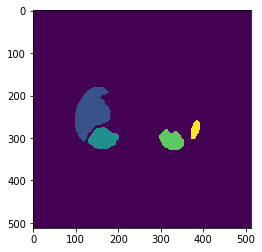

In [9]:
trl_mask=imageio.imread('IMG-0004-00040.png')
trl_mask_resize=img_resize(trl_mask,512)
plt.imshow(trl_mask_resize)

In [46]:
dst_path_256=r'F:\Biomedical images\Train\NIFTI_MR_512x512 png 256grey lvl'
dst_path_64=r'F:\Biomedical images\Train\NIFTI_MR_512x512 png 64grey lvl'
dst_path_128=r'F:\Biomedical images\Train\NIFTI_MR_512x512 png 128grey lvl'
img_paths=os.listdir(dst_path_256)
folder_types=os.listdir(os.path.join(dst_path_256,img_paths[0]))

In [26]:
#main iterating through fileset. 
for root, dirs, files in os.walk(".", topdown=False):
    print(root)
    #If root is the correct one specified, 
    if root.lower().find('ground')!=-1:
        
        new_name=root.lower().split('\\')
        new_name='Pat_'+'_'.join(new_name[1:-1])+'_ground_' 
        sorted_files=sorted(files)
        print(sorted_files)
        for idx,file in enumerate(sorted_files):
            #reading image initially
            tmp_img=imageio.imread(os.path.join(root,file))
            #converting ot initial 256 grey level
            #resizing both image types to 512 resolution for analysis. 
            tmp_img_resize_256=img_resize(tmp_img,512)

            #reformating file name for additoinal underscored
            dst_img_name_256=new_name+'_slice_no_'+str(idx)+'_512x512.png'
            dst_img_path=[x for x in img_paths if root.lower().find(x)!=-1]

            dst_final_path_256=os.path.join(dst_path_256,dst_img_path[0],
                                            'Ground',dst_img_name_256)

            imageio.imwrite(dst_final_path_256,tmp_img_resize_256)



        
    
    

.\1\T1DUAL\DICOM_anon\InPhase
.\1\T1DUAL\DICOM_anon\OutPhase
.\1\T1DUAL\DICOM_anon
.\1\T1DUAL\Ground
['IMG-0004-00002.png', 'IMG-0004-00004.png', 'IMG-0004-00006.png', 'IMG-0004-00008.png', 'IMG-0004-00010.png', 'IMG-0004-00012.png', 'IMG-0004-00014.png', 'IMG-0004-00016.png', 'IMG-0004-00018.png', 'IMG-0004-00020.png', 'IMG-0004-00022.png', 'IMG-0004-00024.png', 'IMG-0004-00026.png', 'IMG-0004-00028.png', 'IMG-0004-00030.png', 'IMG-0004-00032.png', 'IMG-0004-00034.png', 'IMG-0004-00036.png', 'IMG-0004-00038.png', 'IMG-0004-00040.png', 'IMG-0004-00042.png', 'IMG-0004-00044.png', 'IMG-0004-00046.png', 'IMG-0004-00048.png', 'IMG-0004-00050.png', 'IMG-0004-00052.png', 'IMG-0004-00054.png', 'IMG-0004-00056.png', 'IMG-0004-00058.png', 'IMG-0004-00060.png', 'IMG-0004-00062.png', 'IMG-0004-00064.png', 'IMG-0004-00066.png', 'IMG-0004-00068.png', 'IMG-0004-00070.png']
.\1\T1DUAL\mask_roi
.\1\T1DUAL
.\1\T2SPIR\DICOM_anon
.\1\T2SPIR\Ground
['IMG-0002-00001.png', 'IMG-0002-00002.png', 'IMG-0002-00

In [51]:
t1_dual_splits=['inphase','outphase']
pat_splits=['t1dual','t2spir']
combo_split_list=[t1_dual_splits,pat_splits]

# Function calls for renaming an resizing

In [8]:
def img_resize(img,resize_sp):
    """the purpose of this method is to resize image using general linear intepolation. """
    
    PIL_img=Image.fromarray(img)
    
    PIL_img_resize=PIL_img.resize((resize_sp,resize_sp))
    
    return np.array(PIL_img_resize)

t1_dual_splits=['inphase','outphase']
pat_splits=['t1dual','t2spir']
combo_split_list=[t1_dual_splits,pat_splits]

def reformat_file_str_underscore(strs,combo_split_list):
    
    """The purpose of this method is to rename files wrt to split of the naming concentions file structure for ease of use. """
    
    tmp_str_lower=strs.lower()
    #splitting name wrt to combo lists above. 
    split_combo=[y for x in combo_split_list for y in x if tmp_str_lower.find(y)!=-1]
    #Splitting list by combinations.
    tmp_str_concat=None
    for splts in split_combo:
        
        if tmp_str_concat is None:
            tmp_str_split=tmp_str_lower.split(splts)
            tmp_str_concat=tmp_str_split[0]+'_'+splts+tmp_str_split[1]
            
        else:
            tmp_str_concat=tmp_str_concat.split(splts)
            tmp_str_concat=tmp_str_concat[0]+'_'+splts+tmp_str_concat[1]
    
    return tmp_str_concat
    
def quantize_igs(im, levels, qtype='uniform', maxCount=255, displayLevels=None):
    """
    Function to run uniform gray-level and improved gray-scale Quantization.
    This takes in an image, and buckets the gray values depending on the params.
    Args:
        im (array): image to be quantized as an array of values from 0 to 255
        levels (int): number of levels to quantize to.
            This should be a positive integer, and smaller than the maxCount.
        qtype (optional[string]): the type of quantization to perform.
            Can be either 'uniform' or 'igs'; Defaults to 'uniform'.
        maxCount (optional[int]): the maximum value for a digital count
        displayLevels (optional[int]): the number of gray levels to expand to.
            By default this value is None and will shrink the range of greys.
            This value should be a positive integer when provided.
    Return:
        the quantized image
    """
    # default value if we need to return early
    returnImage = im

    # get int type
    dtype = im.dtype

    if (displayLevels == None):
        # by default don't re-expand the image
        displayCount = levels
    elif displayLevels > 0:
        displayCount = displayLevels-1
    else:
        print("displayLevels is an invalid value")
        return returnImage

    # we're getting one more level than we should be, so minus 1
    if ((levels > 0) and (levels < maxCount)):
        levels = levels - 1
    else:
        print("levels needs to be a positive value, and smaller than the maxCount")
        return returnImage

    if (qtype == 'uniform'):
        # uniform method from lecture
        returnImage = np.floor((im/((maxCount+1)/float(levels))))*(displayCount/levels)

    elif (qtype == 'igs'):
        # error diffusion method from lecture

        # default error as 0 for the first pixel
        error = 0

        # the list of rows that will be turned into an image
        returnList = []
        for i in range(len(im)):
            returnRow = []
            for j in range(len(im[i])):
                # get a new digital count with the error
                errDC = im[i][j] + error
                # save the error for the next pixel
                error = errDC % (maxCount/levels)

                # calculate the new digital count, and append it to the row
                newDC = np.floor((errDC)/(maxCount/levels))
                returnRow.append(newDC*(displayCount/levels))
            # append the row to the final image
            returnList.append(np.array(returnRow))

        returnImage = np.array(returnList, dtype)

    else:
        # invalid qtype
        print('qtype is an invalid value, please use "uniform", or "igs"')

    print(returnImage)
    return np.array(returnImage, dtype)

def bytescaling(data, cmin=None, cmax=None, high=255, low=0):
    """
    Converting the input image to uint8 dtype and scaling
    the range to ``(low, high)`` (default 0-255). If the input image already has 
    dtype uint8, no scaling is done.
    :param data: 16-bit image data array
    :param cmin: bias scaling of small values (def: data.min())
    :param cmax: bias scaling of large values (def: data.max())
    :param high: scale max value to high. (def: 255)
    :param low: scale min value to low. (def: 0)
    :return: 8-bit image data array
    """
    if data.dtype == np.uint8:
        return data

    if high > 255:
        high = 255
    if low < 0:
        low = 0
    if high < low:
        raise ValueError("`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint8)
    